0:erkek 1:kadın
1:churn 0:churn değil

In [21]:
%pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.8/150.0 MB 3.3 MB/s eta 0:00:45
    --------------------------------------- 2.6/150.0 MB 3.5 MB/s eta 0:00:43
    --------------------------------------- 3.4/150.0 MB 3.5 MB/s eta 0:00:42
   - -------------------------------------- 4.5/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 5.2/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 6.0/150.0 MB 3.7 MB/s eta 0:00:39
   - -------------------------------------- 7.1/150.0 MB 3.9 MB/s eta 0:00:38
   -- ------------------------------------- 8.1/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 8.9/150.0 MB 3.9 MB/s eta 0:00:36
   -- ------------------------------------- 10.0/150.0 MB 4.0 MB/s eta 0:00:36

In [22]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
##load the data

df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Analyse the Data

In [4]:
# Dropping the last two columns and the client number column

df = df.iloc[:,0:-2]

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [6]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
df.nunique(axis=0)

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
missing = df.isna().sum()
print("Missing values per column:")
display(missing[missing > 0])

Missing values per column:


Series([], dtype: int64)

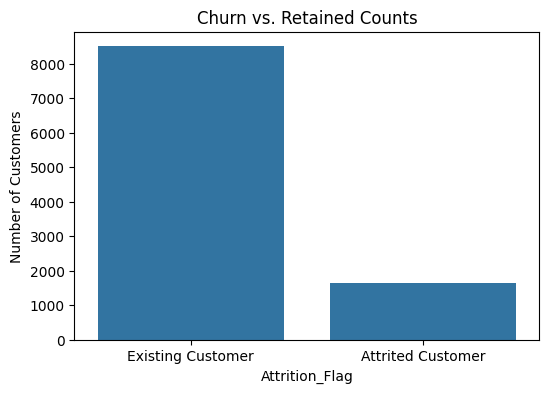

In [9]:
# Target Distribution
target = "Attrition_Flag"
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target)
plt.title("Churn vs. Retained Counts")
plt.xlabel(target)
plt.ylabel("Number of Customers")
plt.show()


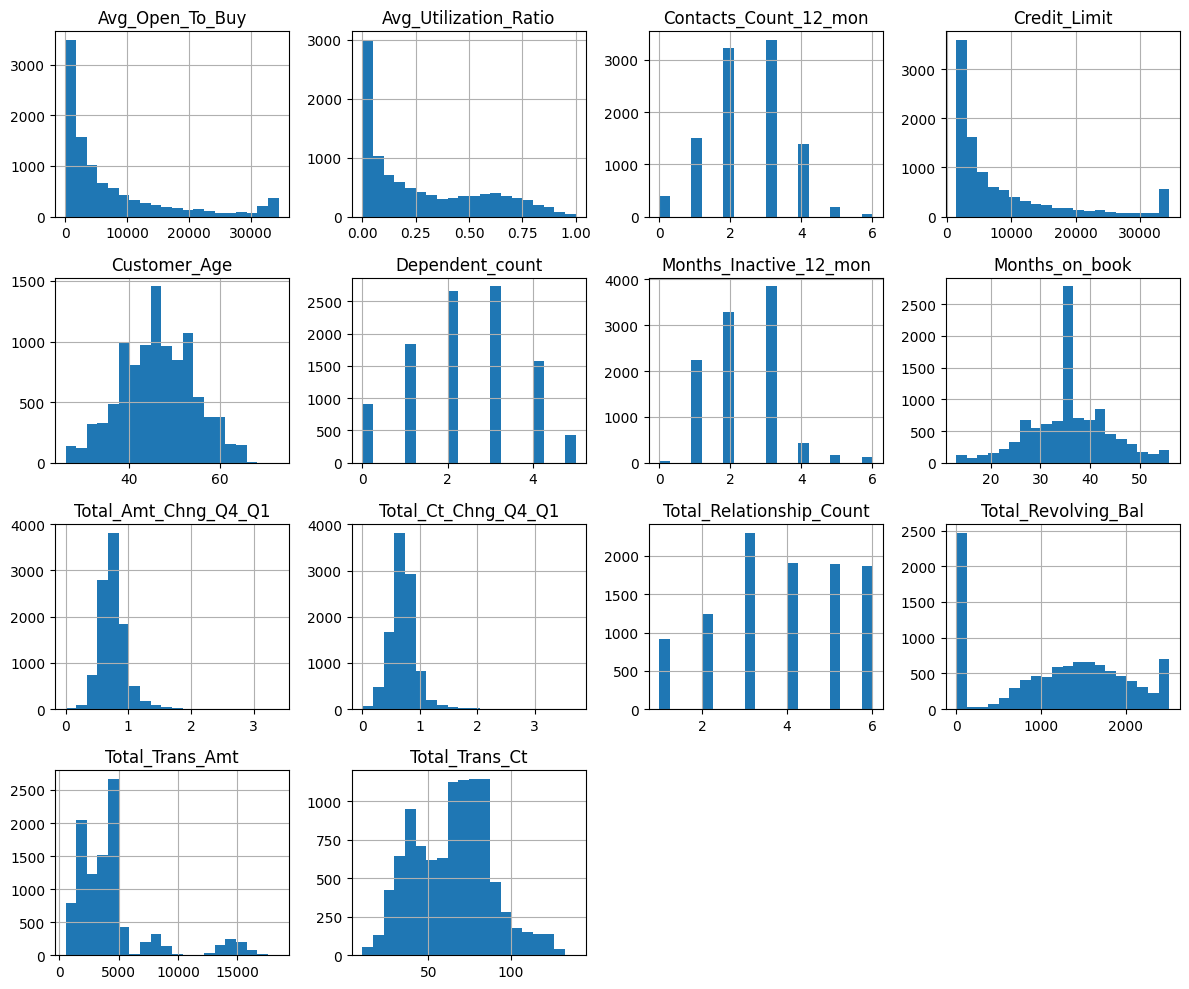

In [10]:
#Numeric Feature Distributions
num_cols = (
    df
    .select_dtypes(include=np.number)
    .columns
    .difference(["CLIENTNUM"])  # drop ID
)
df[num_cols].hist(bins=20, figsize=(12,10), layout=(4,4))
plt.tight_layout()
plt.show()

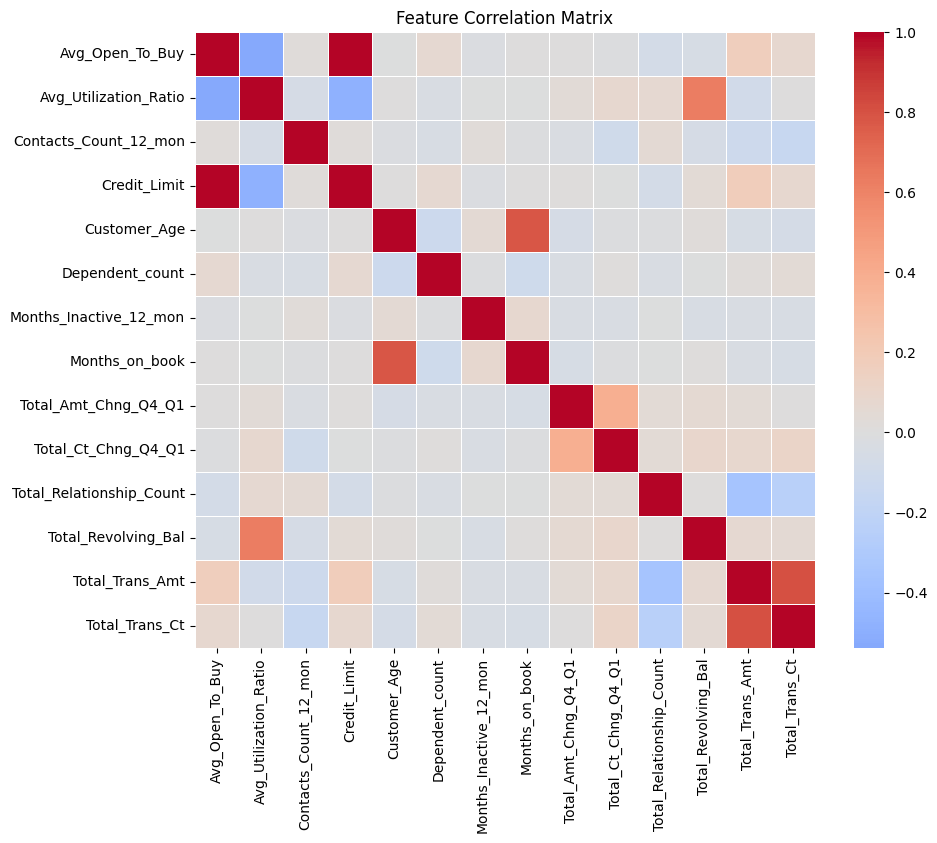

In [11]:
#Correlation Heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## Prepare the Data

In [12]:
# Identify numeric vs. categorical columns
num_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

In [13]:
def handle_catetgorics(df):
    cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
    df_transformed = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

    return df_transformed

In [14]:
df_transformed = handle_catetgorics(df)

In [15]:
df_transformed = df_transformed.drop(columns=['CLIENTNUM', 'Education_Level_Unknown', 'Marital_Status_Unknown', 'Income_Category_Unknown', 'Card_Category_Platinum', 'Attrition_Flag_Existing Customer', 'Gender_M'])

In [16]:
df_transformed = df_transformed.rename(columns={'Attrition_Flag_Attrited Customer': 'Churn'}, inplace=False)
df_transformed = df_transformed.rename(columns={'Gender_F': 'Gender'}, inplace=False)


In [17]:
# Splitting the data into train and test

y = df_transformed["Churn"]
X = df_transformed.drop(['Churn'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

In [18]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
# Applying SMOTE to handle imbalance in target variable

sm = SMOTE(random_state = 69, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

## Model

In [24]:
models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42),
    "RF": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
}

for name, mdl in models.items():
    scores = cross_val_score(
        mdl, X_train, y_train,
        cv=5, scoring="roc_auc", n_jobs=-1
    )
    print(f"{name}: AUC = {scores.mean():.3f} ± {scores.std():.3f}")

LogReg: AUC = 0.942 ± 0.008
RF: AUC = 0.997 ± 0.003
XGB: AUC = 0.998 ± 0.004


In [26]:
for name, mdl in models.items():
    # 1) Fit on all training data
    mdl.fit(X_train_pre, y_train)

    # 2) Predict on test
    preds = mdl.predict(X_test_pre)
    proba = mdl.predict_proba(X_test_pre)[:,1]

    # 3) Print key metrics
    print(f"\n{name} Test Metrics")
    print(classification_report(y_test, preds))
    print("ROC AUC:", roc_auc_score(y_test, proba))

    # 4) Visualize
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    ConfusionMatrixDisplay.from_predictions(y_test, preds, normalize="true", ax=plt.gca())
    plt.title(f"{name} Confusion Matrix")

    plt.subplot(1,2,2)
    RocCurveDisplay.from_predictions(y_test, proba, ax=plt.gca())
    plt.title(f"{name} ROC Curve")
    plt.tight_layout()
    plt.show()

NameError: name 'X_train_pre' is not defined